In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import json

In [4]:
# manual function

def load_data(filename):
    with open(f'raw_data/{filename}.txt','r') as f:
        data = f.read().split('\n')
    return data

def text_to_dict(filename):
    labels,titles,reviews = [],[],[]
    count = 0
    for raw_review in tqdm(filename):
        if len(raw_review) == 0:
            continue
        labels.append(raw_review[9])
        title, review = raw_review[11:].split(': ',1)
        titles.append(title)
        reviews.append(review)
    labels = list(map(int,labels))
    titles = list(map(str.lower,titles))
    reviews = list(map(str.lower,reviews))
    tranformed_data = [{'label':labels[i],
                   'title': titles[i],
                   'review': reviews[i]
                  } for i in range(len(labels))]
    return tranformed_data

def unique_label(filename):
    unique_labels = set()
    labels = [review['label'] for review in filename]
    for label in labels:
        unique_labels.add(label)
    return unique_labels

def length_histogram(filename, key, text):
    string = [review[key] for review in filename]
    length = [len(s.split(' ')) for s in string]
    plt.hist(length, density=True, bins=30)
    plt.xlabel(f'{text} length')
    plt.ylabel('frequency')

In [5]:
train = load_data('train')
test = load_data('test')

print(len(train))
print(len(test))

3600001
400001


In [6]:
train = text_to_dict(train)
test = text_to_dict(test)

print(train[0])
print(test[0])

100%|█████████████████████████████| 400001/400001 [00:00<00:00, 1049271.14it/s]


{'label': 2, 'title': 'stuning even for the non-gamer', 'review': 'this sound track was beautiful! it paints the senery in your mind so well i would recomend it even to people who hate vid. game music! i have played the game chrono cross but out of all of the games i have ever played it has the best music! it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. it would impress anyone who cares to listen! ^_^'}
{'label': 2, 'title': 'great cd', 'review': 'my lovely pat has one of the great voices of her generation. i have listened to this cd for years and i still love it. when i\'m in a good mood it makes me feel better. a bad mood just evaporates like sugar in the rain. this cd just oozes life. vocals are jusat stuunning and lyrics just kill. one of life\'s hidden gems. this is a desert isle cd in my book. why she never made it big is just beyond me. everytime i play this, no matter black, white, young, old, male, female everybody says 

In [7]:
print(unique_label(train))
print(unique_label(test))

{1, 2}
{1, 2}


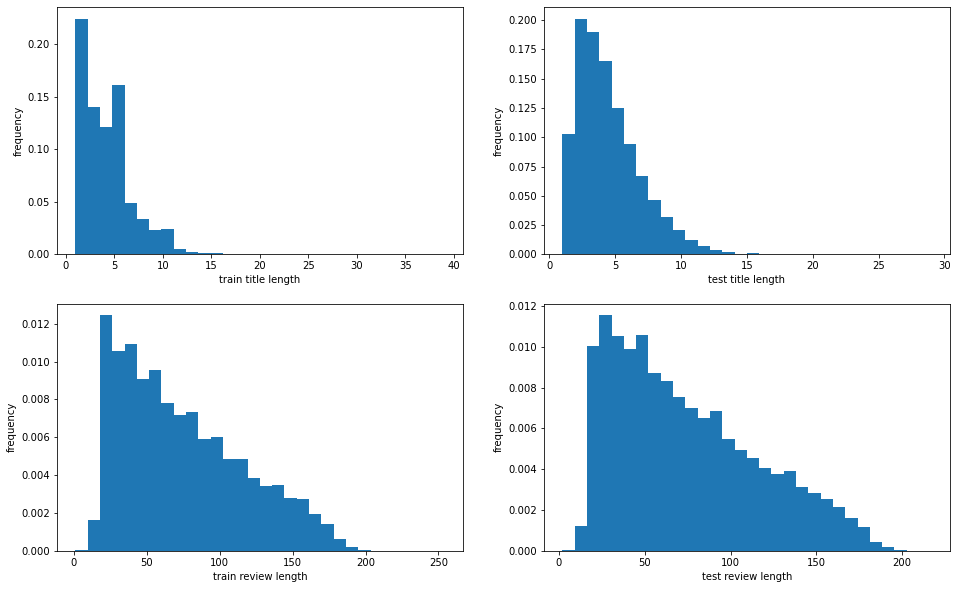

In [16]:
plt.figure(figsize = (16,10), dpi = 72)
plt.subplot(2, 2, 1)
length_histogram(train,'title', 'train title')
plt.subplot(2, 2, 2)
length_histogram(test,'title', 'test title')
plt.subplot(2, 2, 3)
length_histogram(train,'review', 'train review')
plt.subplot(2, 2, 4)
length_histogram(test,'review', 'test review')

In [10]:
def writefile(file,name):
    with open(f'dataset/{name}.json','w', encoding = 'utf-8') as f:
        for line in tqdm(file):
            f.write(str(line) +'\n')
            
writefile(train,'train')
writefile(test,'test')

100%|██████████████████████████████| 400000/400000 [00:01<00:00, 263664.73it/s]


In [13]:
def chunk_split(filename, chunksize = 1000):
    data_length = len(filename)
    chunk_num = int(data_length//chunksize)
    for i in range(chunk_num):
        sublist = filename[i*chunksize:(i+1)*chunksize]
        with open(f'chunk_{i}.json','w', encoding = 'utf-8') as f:
            json.dump(sublist,f)
            
chunk_split(train)
chunk_split(test)